# Лабораторная работа 1: Исследование набора данных

**Датасет:** Wine Quality Dataset (UCI Machine Learning Repository)

## 1. Импорт библиотек

In [ ]:
!pip -q install pandas numpy matplotlib scikit-learn seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

%matplotlib inline

## 2. Загрузка данных

In [2]:
red_wine = pd.read_csv('WineQuality-RedWine.csv')
white_wine = pd.read_csv('WineQuality-WhiteWine.csv')

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

print(f"Красное вино: {red_wine.shape}")
print(f"Белое вино: {white_wine.shape}")
print(f"Общий размер: {wine_data.shape}")

Красное вино: (1599, 13)
Белое вино: (4898, 13)
Общий размер: (6497, 13)


## 3. Описание датасета

### 3.1 Предметная область и источник данных

**Предметная область:** Виноделие, оценка качества вина

**Источник данных:** UCI Machine Learning Repository
- Создан: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
- Публикация: Cortez et al., 2009, Decision Support Systems, Elsevier
- Ссылка: https://www.kaggle.com/datasets/huseyinelci/wne-qualty-by-uci

**Характер данных:** Реальные данные физико-химических тестов португальского вина "Vinho Verde"

**Описание задачи:** Предсказание качества вина на основе физико-химических свойств. Может рассматриваться как задача классификации или регрессии.

### 3.2 Описание атрибутов

In [3]:
# Загрузка описания признаков
column_desc = pd.read_csv('DescriptionOfColumn.csv', encoding='latin-1')
column_desc[['Column_Name', 'Description']].head(12)

,Column_Name,Description
0,fixed acidity,This column is most acids involved with wine o...
1,volatile acidity,The amount of acetic acid in wine which at thi...
2,citric acid,"When found in small quantities, citric acid ca..."
3,residual sugar,The amount of sugar remaining after fermentati...
4,chlorides,This column gives the amount of salt in the wine.
5,free sulfur dioxide,The free form of SO2 exists in equilibrium bet...
6,total sulfur dioxide,Amount of free and bound forms of S02. This am...
7,density,This column gives the density. The density of ...
8,pH,This column gives the amount of acid or wine b...
9,sulphates,This column gives the amount of sulphates of c...


**Входные переменные (физико-химические свойства):**

1. **fixed acidity** - постоянная кислотность (нелетучие кислоты)
2. **volatile acidity** - летучая кислотность (уксусная кислота, высокие значения ухудшают вкус)
3. **citric acid** - лимонная кислота (добавляет свежесть и аромат)
4. **residual sugar** - остаточный сахар после ферментации
5. **chlorides** - содержание соли
6. **free sulfur dioxide** - свободный SO2 (предотвращает микробный рост)
7. **total sulfur dioxide** - общий SO2 (свободный + связанный)
8. **density** - плотность вина
9. **pH** - уровень кислотности (3-4 для большинства вин)
10. **sulphates** - сульфаты (антимикробное и антиоксидантное действие)
11. **alcohol** - содержание алкоголя в %

**Выходная переменная:**

12. **quality** - качество вина (оценка от 0 до 10 на основе экспертных оценок)

**Типы данных:** Все признаки числовые (float/int)

In [4]:
print("Информация о датасете")
wine_data.info()

print("\nПервые 5 строк")
display(wine_data.head())

print("\nТипы данных")
display(wine_data.dtypes)

Информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Первые 5 строк


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,red



Типы данных


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

## 4. Анализ атрибутов

### 4.1 Базовая статистика

In [5]:
# Получаем числовые столбцы (исключаем wine_type)
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns.tolist()

# Описательная статистика
stats_df = wine_data[numeric_cols].describe().T
stats_df['std'] = wine_data[numeric_cols].std()
stats_df = stats_df[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print("Описательная статистика")
display(stats_df)

Описательная статистика


,mean,std,min,25%,50%,75%,max
fixed acidity,7.215,1.296,3.800,6.400,7.000,7.700,15.900
volatile acidity,0.340,0.165,0.080,0.230,0.290,0.400,1.580
citric acid,0.319,0.145,0.000,0.250,0.310,0.390,1.660
residual sugar,5.443,4.758,0.600,1.800,3.000,8.100,65.800
chlorides,0.056,0.035,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,30.525,17.749,1.000,17.000,29.000,41.000,289.000
total sulfur dioxide,115.745,56.522,6.000,77.000,118.000,156.000,440.000
density,0.995,0.003,0.987,0.992,0.995,0.997,1.039
pH,3.219,0.161,2.720,3.110,3.210,3.320,4.010
sulphates,0.531,0.149,0.220,0.430,0.510,0.600,2.000


### 4.2 Проверка пропущенных значений

In [8]:
missing_data = pd.DataFrame({
    'Признак': wine_data.columns,
    'Пропуски': wine_data.isnull().sum(),
    'Процент': (wine_data.isnull().sum() / len(wine_data) * 100).round(2)
})

print("Пропущенные значения")
display(missing_data)

Пропущенные значения


,Признак,Пропуски,Процент
fixed acidity,fixed acidity,0,0.0
volatile acidity,volatile acidity,0,0.0
citric acid,citric acid,0,0.0
residual sugar,residual sugar,0,0.0
chlorides,chlorides,0,0.0
free sulfur dioxide,free sulfur dioxide,0,0.0
total sulfur dioxide,total sulfur dioxide,0,0.0
density,density,0,0.0
pH,pH,0,0.0
sulphates,sulphates,0,0.0


**Вывод:** Согласно документации и проверке, в датасете отсутствуют пропущенные значения. Обработка не требуется.

### 4.3 Распределение признаков и выбросы

Построим гистограммы распределения для каждого признака и определим выбросы методом IQR (межквартильный размах)

In [ ]:
# Функция для определения выбросов методом IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Анализ выбросов для всех числовых признаков
outliers_summary = []

for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(wine_data, col)
    outliers_summary.append({
        'Признак': col,
        'Количество выбросов': n_outliers,
        'Процент': round(n_outliers / len(wine_data) * 100, 2),
        'Нижняя граница': round(lower, 3),
        'Верхняя граница': round(upper, 3)
    })

outliers_df = pd.DataFrame(outliers_summary)
print("Анализ выбросов (метод IQR)")
display(outliers_df)

Анализ выбросов (метод IQR)


,Признак,Количество выбросов,Процент,Нижняя граница,Верхняя граница
0,fixed acidity,357,5.49,4.450,9.650
1,volatile acidity,377,5.80,-0.025,0.655
2,citric acid,509,7.83,0.040,0.600
3,residual sugar,118,1.82,-7.650,17.550
4,chlorides,286,4.40,-0.003,0.106
5,free sulfur dioxide,62,0.95,-19.000,77.000
6,total sulfur dioxide,10,0.15,-41.500,274.500
7,density,3,0.05,0.985,1.004
8,pH,73,1.12,2.795,3.635
9,sulphates,191,2.94,0.175,0.855


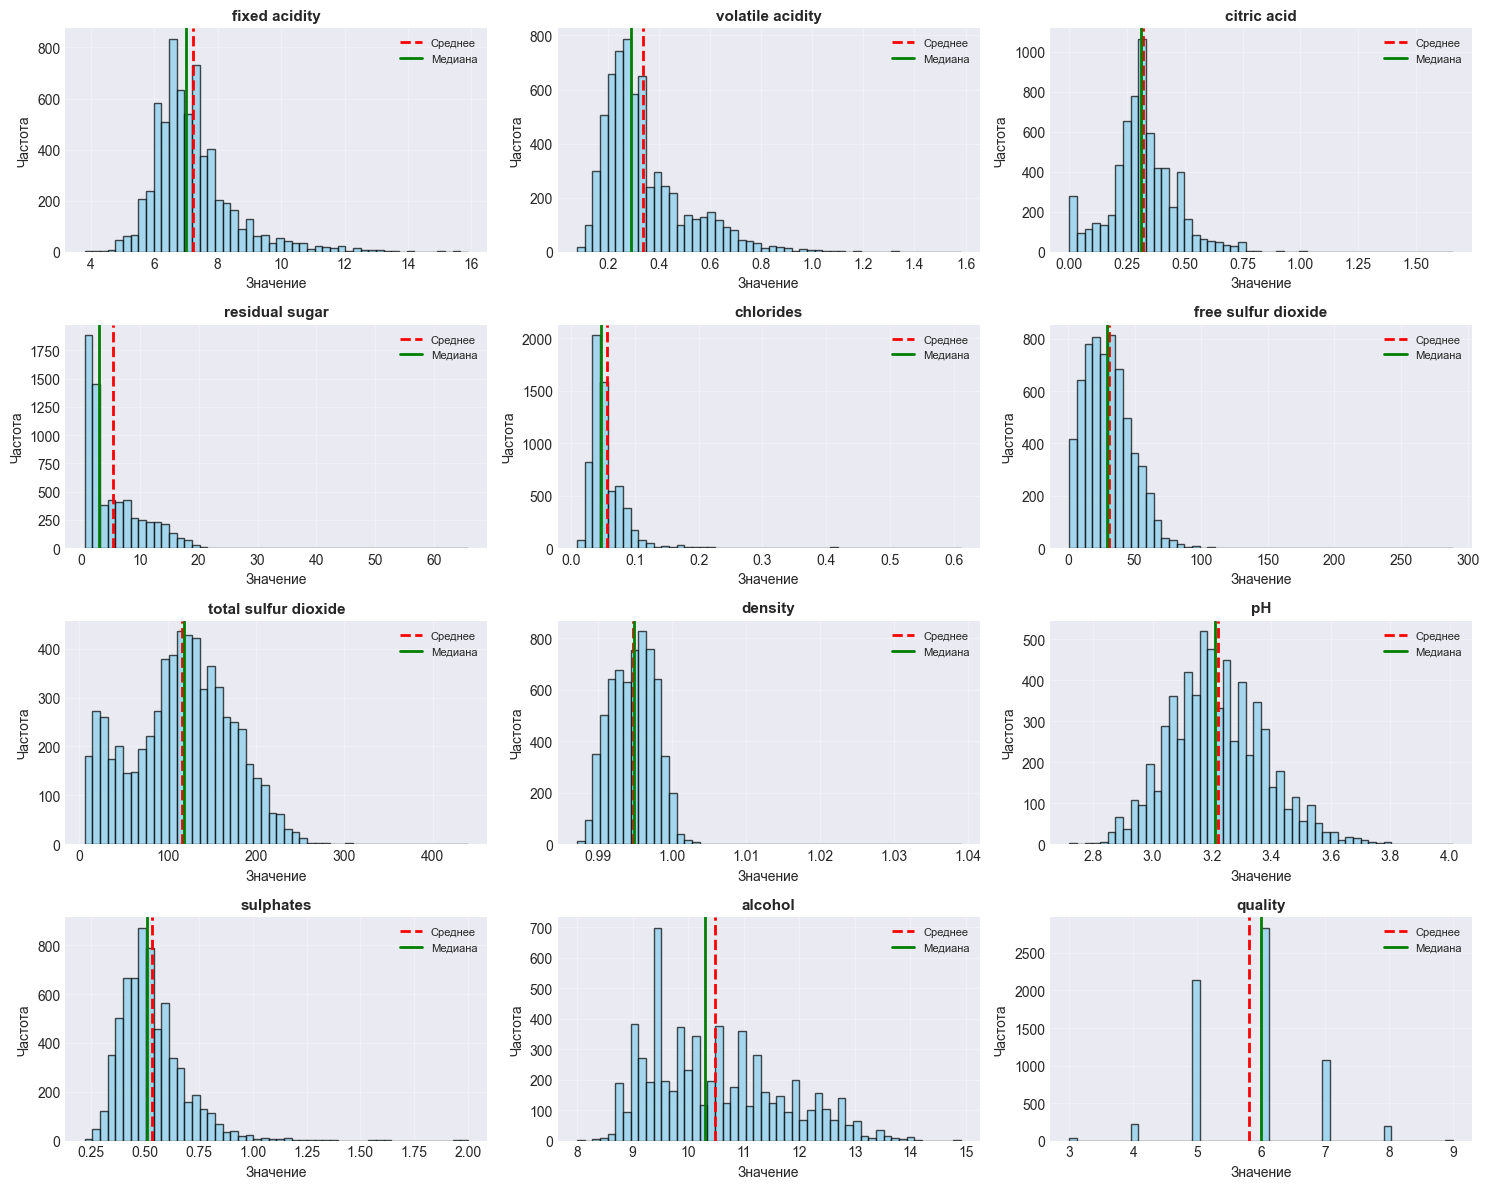

In [10]:
# Построение гистограмм распределения
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(wine_data[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].axvline(wine_data[col].mean(), color='red', linestyle='--', linewidth=2, label='Среднее')
    axes[idx].axvline(wine_data[col].median(), color='green', linestyle='-', linewidth=2, label='Медиана')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Значение')
    axes[idx].set_ylabel('Частота')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distributions.png', dpi=100, bbox_inches='tight')
plt.show()

### 4.4 Box plots для визуализации выбросов

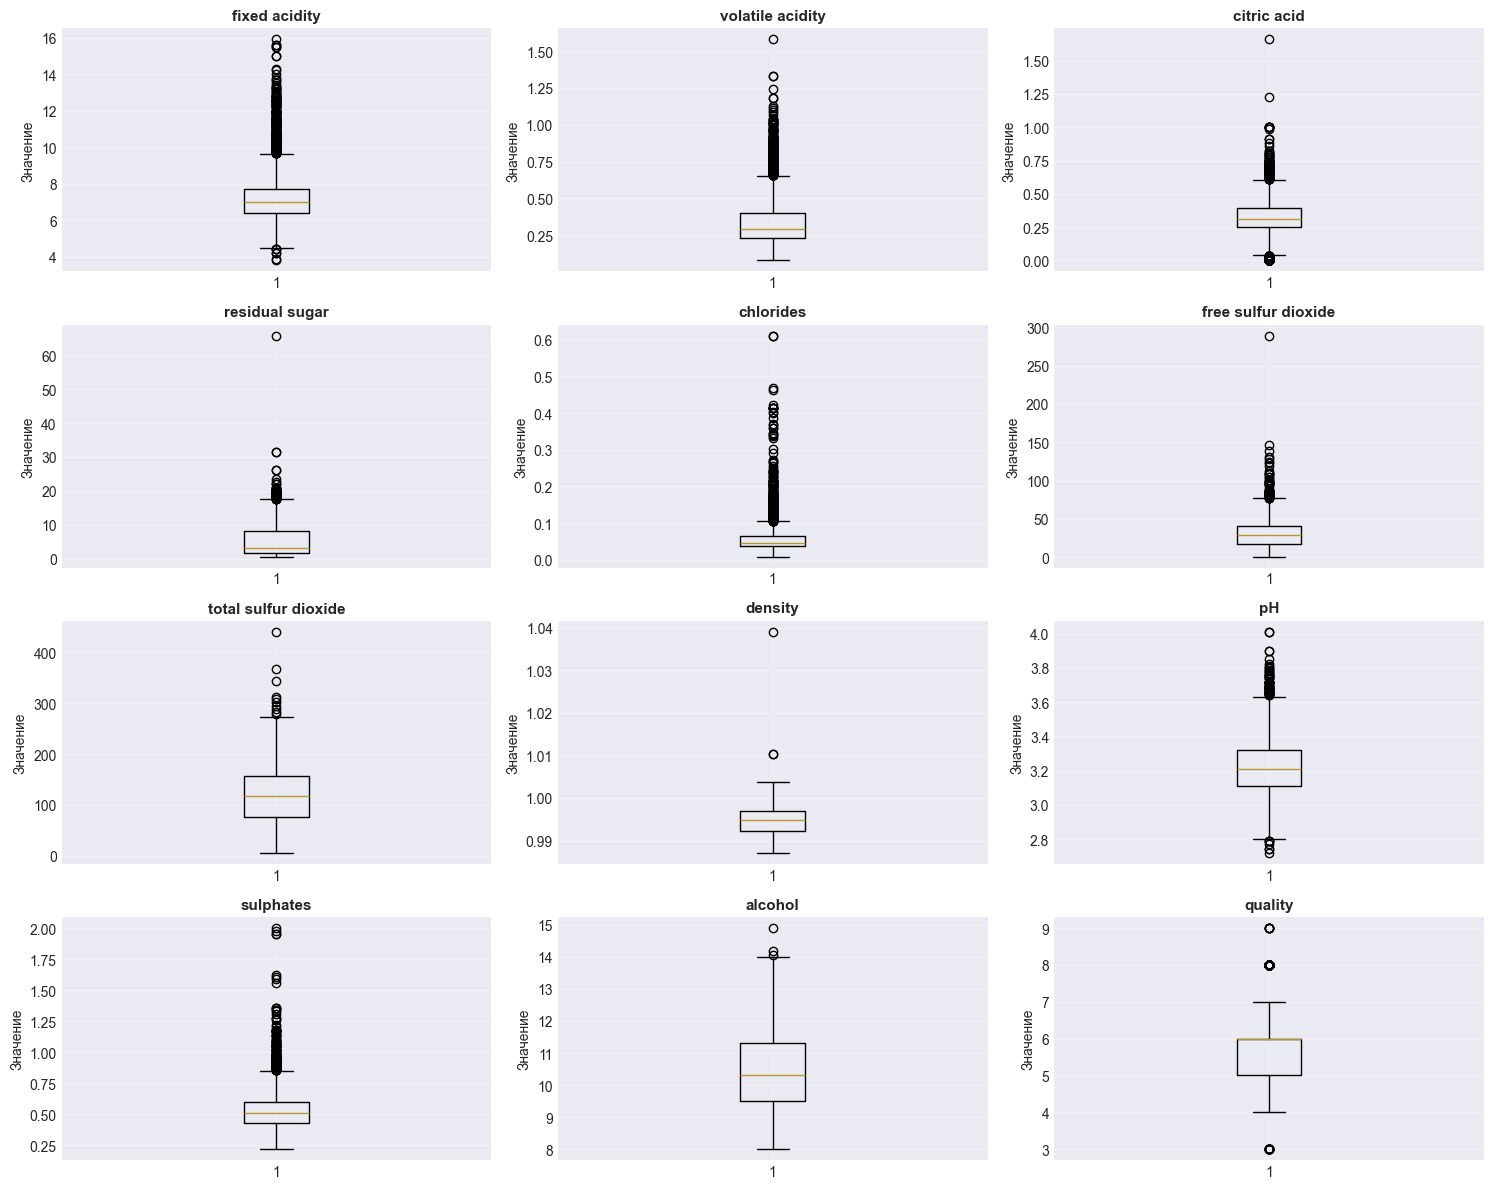

In [11]:
# Построение box plots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(wine_data[col].dropna(), vert=True)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Значение')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('boxplots.png', dpi=100, bbox_inches='tight')
plt.show()

### 4.5 Анализ целевой переменной (quality)

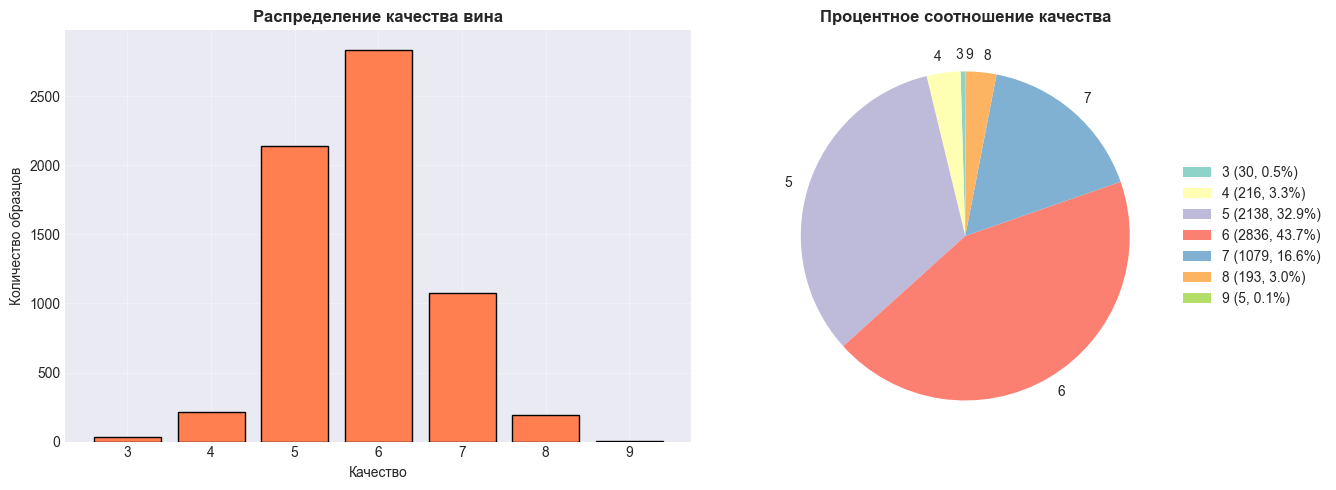

Среднее: 5.82
Медиана: 6


quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

In [ ]:
# Распределение качества вина
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

quality_counts = wine_data['quality'].value_counts().sort_index()

# Гистограмма
axes[0].bar(quality_counts.index, quality_counts.values, color='coral', edgecolor='black')
axes[0].set_title('Распределение качества вина', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Качество')
axes[0].set_ylabel('Количество образцов')
axes[0].grid(True, alpha=0.3)

# Круговая диаграмма с процентами
labels = [f'{idx} ({cnt}, {cnt/len(wine_data)*100:.1f}%)'
          for idx, cnt in quality_counts.items()]
axes[1].pie(quality_counts.values, labels=quality_counts.index,
            startangle=90, colors=plt.cm.Set3.colors)
axes[1].set_title('Процентное соотношение качества', fontsize=12, fontweight='bold')
axes[1].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('quality_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"Среднее: {wine_data['quality'].mean():.2f}")
print(f"Медиана: {wine_data['quality'].median():.0f}")
quality_counts

**Выводы по распределениям:**

1. Большинство признаков имеют асимметрию
2. Целевая переменная (quality) несбалансирована - большинство вин имеют оценку 5-6
3. Обнаружены выбросы в большинстве признаков, что характерно для реальных данных
4. Выбросы могут представлять редкие, но качественные или плохие вина

### 4.6 Предложение по обработке выбросов

**Варианты обработки выбросов:**

- Удаление - не рекомендуется, выбросы важны для редких качеств
- Винсоризация (5-95 перцентиль)
- Логарифмирование для признаков с асимметрией (residual sugar, sulfur dioxide)
- Оставить как есть

Думаю лучше всего оставить пока что как все есть

## 5. Корреляционный анализ

### 5.1 Корреляционная матрица

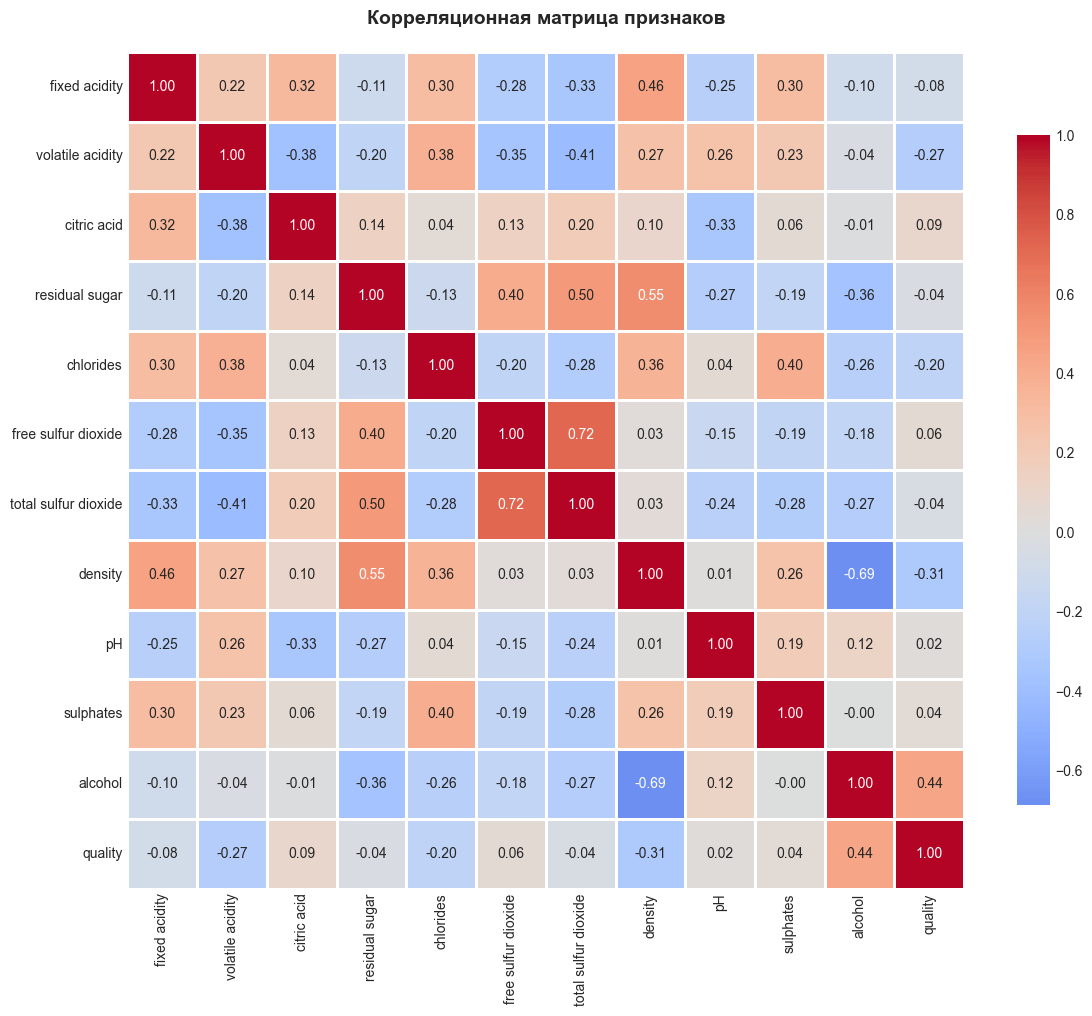

In [14]:
# Вычисление корреляционной матрицы
correlation_matrix = wine_data[numeric_cols].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица признаков', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

### 5.2 Высококоррелированные признаки

In [15]:
# Поиск высококоррелированных пар (|r| > 0.5)
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append({
                'Признак 1': correlation_matrix.columns[i],
                'Признак 2': correlation_matrix.columns[j],
                'Корреляция': round(correlation_matrix.iloc[i, j], 3),
                'Характер': 'Положительная' if correlation_matrix.iloc[i, j] > 0 else 'Отрицательная'
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Корреляция', key=abs, ascending=False)

print("Высококоррелированные пары признаков (|r| > 0.5)")
display(high_corr_df)

Высококоррелированные пары признаков (|r| > 0.5)


,Признак 1,Признак 2,Корреляция,Характер
1,free sulfur dioxide,total sulfur dioxide,0.721,Положительная
2,density,alcohol,-0.687,Отрицательная
0,residual sugar,density,0.553,Положительная


### 5.3 Корреляция с целевой переменной

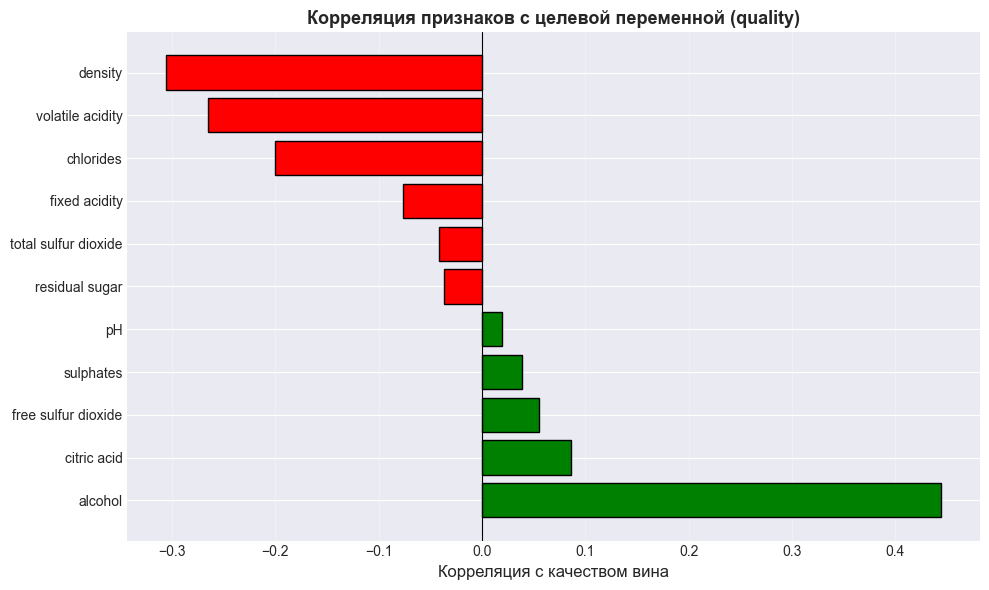

Корреляция с quality
alcohol                 0.444
citric acid             0.086
free sulfur dioxide     0.055
sulphates               0.038
pH                      0.020
residual sugar         -0.037
total sulfur dioxide   -0.041
fixed acidity          -0.077
chlorides              -0.201
volatile acidity       -0.266
density                -0.306
Name: quality, dtype: float64


In [16]:
# Корреляция признаков с quality
quality_corr = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in quality_corr.values]
plt.barh(quality_corr.index, quality_corr.values, color=colors, edgecolor='black')
plt.xlabel('Корреляция с качеством вина', fontsize=12)
plt.title('Корреляция признаков с целевой переменной (quality)', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('quality_correlation.png', dpi=100, bbox_inches='tight')
plt.show()

print("Корреляция с quality")
print(quality_corr)

### 5.4 Некоррелированные признаки

In [17]:
# Поиск слабо коррелированных пар (|r| < 0.1)
low_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) < 0.1:
            low_corr_pairs.append({
                'Признак 1': correlation_matrix.columns[i],
                'Признак 2': correlation_matrix.columns[j],
                'Корреляция': round(correlation_matrix.iloc[i, j], 3)
            })

low_corr_df = pd.DataFrame(low_corr_pairs).sort_values('Корреляция', key=abs)

print("Слабо коррелированные пары признаков (|r| < 0.1)")
display(low_corr_df.head(10))

Слабо коррелированные пары признаков (|r| < 0.1)


,Признак 1,Признак 2,Корреляция
16,sulphates,alcohol,-0.003
6,citric acid,alcohol,-0.010
14,density,pH,0.012
15,pH,quality,0.020
10,free sulfur dioxide,density,0.026
12,total sulfur dioxide,density,0.032
8,residual sugar,quality,-0.037
2,volatile acidity,alcohol,-0.038
17,sulphates,quality,0.038
3,citric acid,chlorides,0.039


### 5.5 Графики рассеивания (Scatter Plot Matrix)

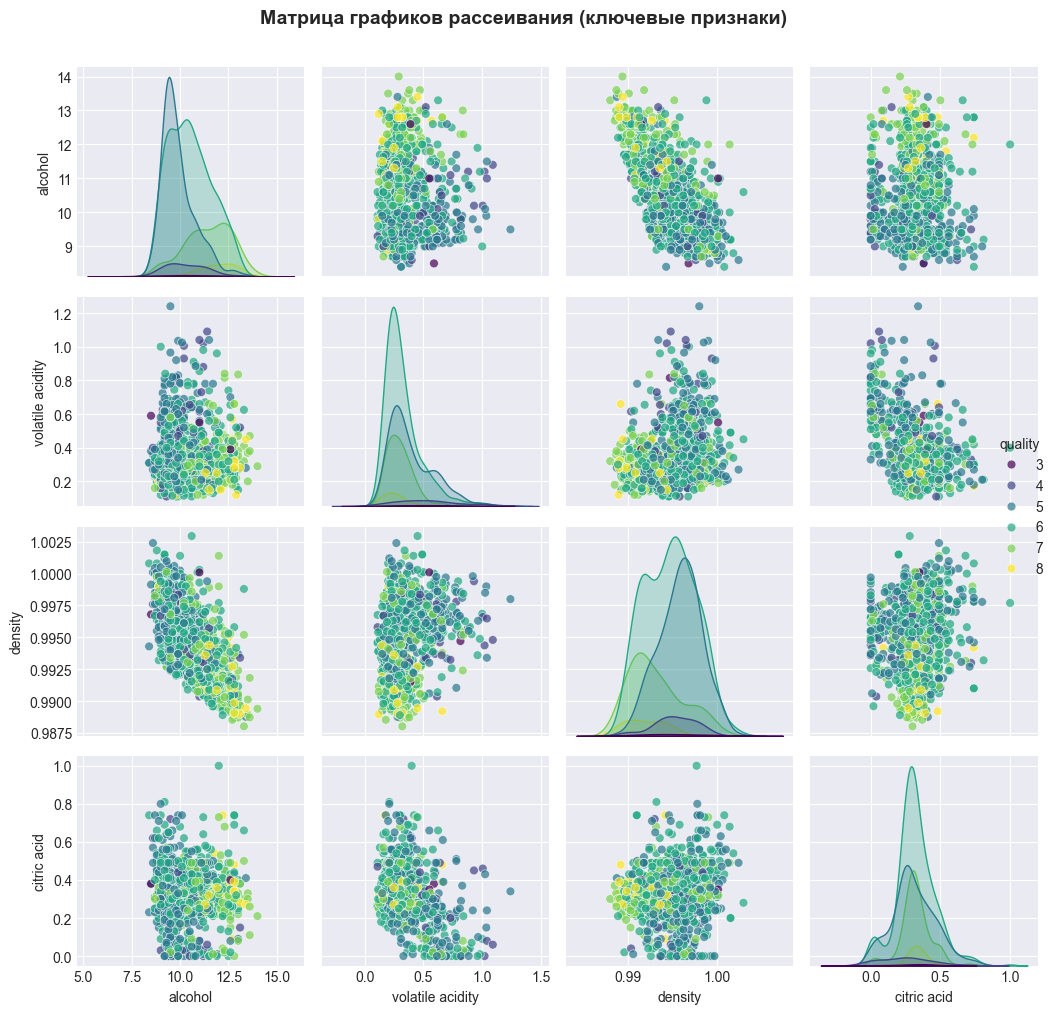

In [20]:
# Матрица графиков - возьмем sample для наглядности
important_features = ['alcohol', 'volatile acidity', 'density', 'citric acid', 'quality']

sample_data = wine_data[important_features].sample(n=1000, random_state=42)

g = sns.pairplot(sample_data, hue='quality', palette='viridis',
                 diag_kind='kde', plot_kws={'alpha': 0.7, 's': 40}, height=2.5)
g.fig.suptitle('Матрица графиков рассеивания (ключевые признаки)', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('scatter_matrix.png', dpi=100)
plt.show()

### 5.6 Детальные scatter plots для сильно коррелированных пар

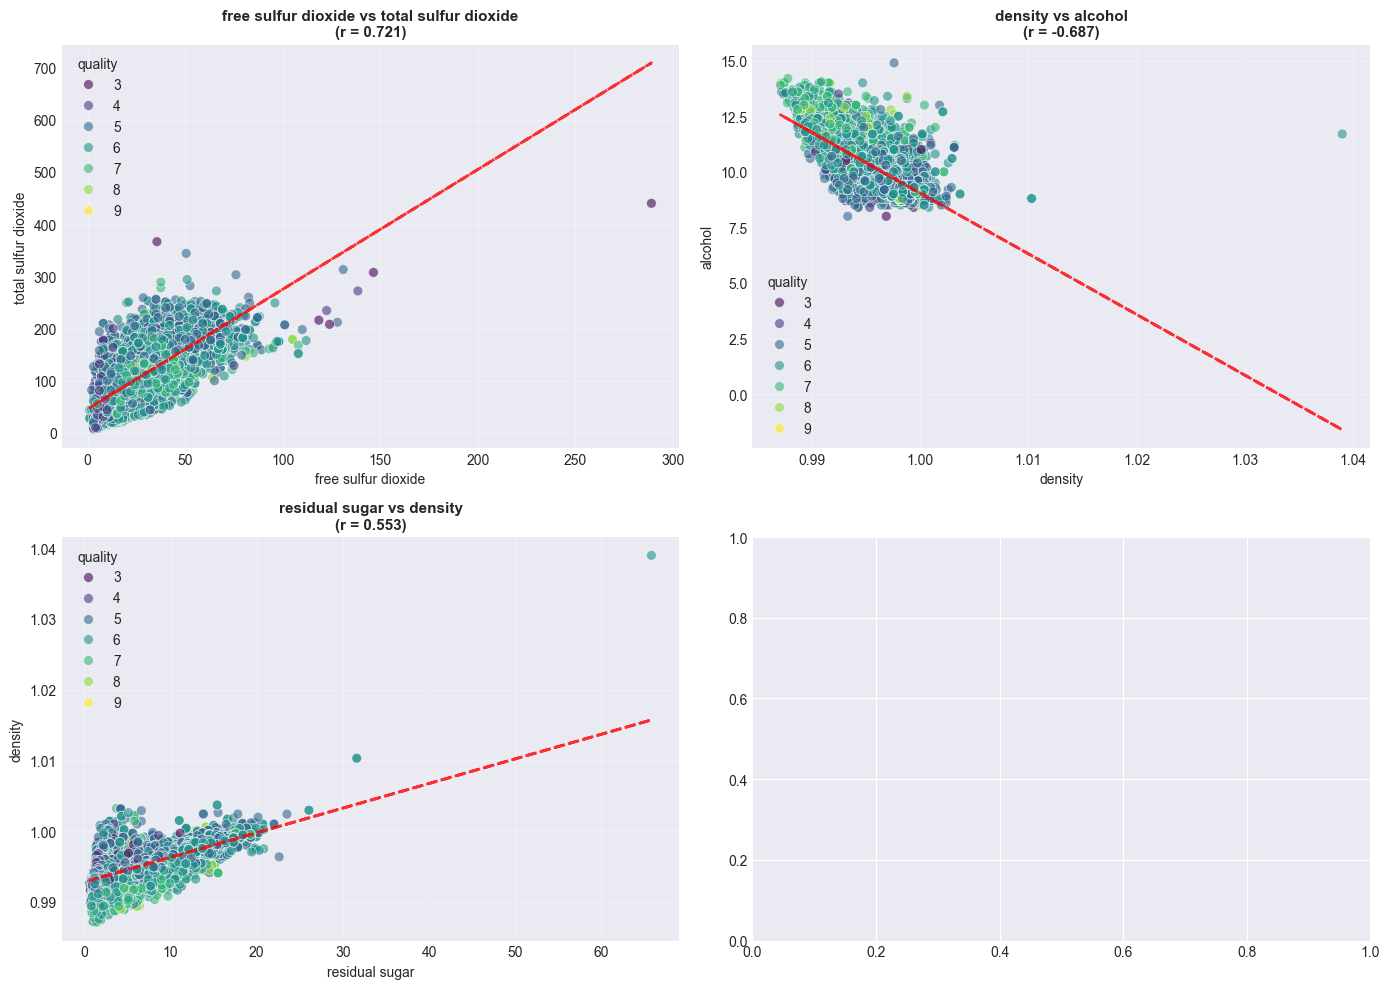

In [ ]:
# Визуализация топ-4 сильно коррелированных пар
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

top_pairs = high_corr_df.head(4)

for idx, row in enumerate(top_pairs.itertuples()):
    x_col = row._1  # Признак 1
    y_col = row._2  # Признак 2
    corr_val = row.Корреляция

    sns.scatterplot(data=wine_data, x=x_col, y=y_col, hue='quality',
                   palette='viridis', alpha=0.6, s=50, ax=axes[idx])
    axes[idx].set_title(f'{x_col} vs {y_col}\n(r = {corr_val:.3f})',
                       fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # Добавление линии тренда
    z = np.polyfit(wine_data[x_col], wine_data[y_col], 1)
    p = np.poly1d(z)
    axes[idx].plot(wine_data[x_col], p(wine_data[x_col]), "r--", linewidth=2, alpha=0.8)

plt.tight_layout()
plt.savefig('top_correlations_scatter.png', dpi=100, bbox_inches='tight')
plt.show()

## 6. Выводы и анализ результатов

### 6.1 Характеристики датасета

- 6497 образцов (1599 красных + 4898 белых вин)
- 11 числовых признаков, пропуски отсутствуют
- Целевая переменная несбалансирована: 76.6% вин имеют оценки 5-6
- Выбросы присутствуют во всех признаках (0.05-7.83%)

### 6.2 Распределения

Большинство признаков со смещением вправо (residual sugar, chlorides, sulfur dioxide). Признаки density, pH, alcohol близки к нормальному. Выбросы рекомендуется оставить - могут быть важны для редких классов качества.

### 6.3 Корреляционный анализ

**Высокая корреляция между признаками (|r| > 0.5):**
- free sulfur dioxide <-> total sulfur dioxide (0.721) - ожидаемая зависимость
- density <-> alcohol (-0.687) - физическая связь
- residual sugar <-> density (0.553) - больше сахара - выше плотность

**Связь с качеством:**
- Положительная: alcohol (0.444), citric acid (0.086)
- Отрицательная: density (-0.306), volatile acidity (-0.266), chlorides (-0.201)

**Вывод:** Качество вина определяется балансом алкоголя, кислотности и плотности. Больше alcohol - выше качество. Больше volatile acidity - ниже качество.

### 6.4 Рекомендации для моделирования

**Предобработка:**
1. Масштабирование - RobustScaler (из-за выбросов)
2. Логарифмирование для residual sugar, chlorides, sulfur dioxide
3. Рассмотреть удаление одного из пары: free/total sulfur dioxide

**Балансировка классов:**
- Бинарная задача: quality >= 7 (хорошее вино) vs quality < 7
- Мультиклассовая: class_weight='balanced', SMOTE

**Feature engineering:**
- bound_so2 = total_sulfur_dioxide - free_sulfur_dioxide
- sugar_alcohol_ratio = residual_sugar / alcohol

### 6.5 Итог

Датасет подходит для классификации. Основные факторы - alcohol, volatile acidity, density. Данные структурированы, корреляции логичны. Требуется предобработка (масштабирование, балансировка) перед обучением моделей.